# Paycheck Protection Program

The Paycheck Protection Program (PPP) is a $953-billion business loan program established by the United States federal government, led by the Donald Trump administration in 2020 through the Coronavirus Aid, Relief, and Economic Security Act (CARES Act) to help certain businesses, self-employed workers, sole proprietors, certain nonprofit organizations, and tribal businesses continue paying their workers.

The Paycheck Protection Program allows entities to apply for low-interest private loans to pay for their payroll and certain other costs. The amount of a PPP loan is approximately equal to 2.5 times the applicant's average monthly payroll costs. In some cases, an applicant may receive a second draw typically equal to the first. The loan proceeds may be used to cover payroll costs, rent, interest, and utilities. The loan may be partially or fully forgiven if the business keeps its employee counts and employee wages stable. The program is implemented by the U.S. Small Business Administration. 

# Objective

Performing EDA - Exploratory Data Analysis on the Data(using any necessary data wrangling/preparation steps) and create professional visualizations to share.

# Loading and Wrangling Data

In [1]:
# Loading all the packages needed for the analysis
import pandas as pd #pandas for data wrangling/preparation
import missingno as msno #Python library for the exploratory visualization of missing data
import matplotlib.pyplot as plt #library for matplotlib visualization
import matplotlib.dates as mdates #for time series plot
import seaborn as sns #library for seaborn visualization
sns.set(font_scale = 1.2, style = 'ticks')
import plotly.express as px #library for plotly visualization
from pylab import rcParams 
rcParams['figure.figsize'] = 10,8 

In [2]:
# Reading the data 
# Data is from the official website, which I have uploaded in the kaggle Dataset URL: https://www.kaggle.com/datasets/johnp47/paycheck-protection-programppp-foia
ppp_df = pd.read_csv('../input/paycheck-protection-programppp-foia/public_150k_plus_220403.csv')

In [3]:
# Head of the dataframe
ppp_df.head(10)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021
5,9774337701,05/01/2020,101,PPP,HUDSON EXTRUSIONS INC.,NaN,NaN,NaN,NaN,11/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,332137.41,05/10/2021
6,9794577700,05/01/2020,491,PPP,FRUIT COVE BAPTIST CHURCH OF JACKSONVILLE FL INC,501 State Road 13,Saint Johns,NaN,32259-2832,02/19/2021,...,Non-Profit Organization,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,Y,291741.75,01/07/2021
7,9722187702,05/01/2020,101,PPP,MIAMITOWN AUTO PARTS AND RECYCLING INC,NaN,NaN,NaN,NaN,02/24/2021,...,Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,269416.44,01/25/2021
8,9725917702,05/01/2020,101,PPP,POPPYCOCKS INC,NaN,NaN,NaN,NaN,08/17/2021,...,Subchapter S Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,259982.88,06/24/2021
9,9666867710,05/01/2020,101,PPP,CHURCH SQUARE PHARMACY INC,NaN,NaN,NaN,NaN,04/21/2021,...,Corporation,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,252253.42,03/31/2021


In [4]:
ppp_df['BorrowerState'].unique()

array([nan, 'AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE',
       'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND',
       'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI',
       'WV', 'WY'], dtype=object)

In [5]:
ppp_df.shape

(968532, 53)

In [6]:
# Tail of the Dataframe
ppp_df.tail()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
968527,4395967002,04/03/2020,897,PPP,"ROY E PAULSON, JR., P.C.",102 N. Kenwood,CASPER,WY,82601-2724,01/13/2021,...,Corporation,42366,Platte Valley Bank,TORRINGTON,WY,Male Owned,Non-Veteran,NaN,151037.50,12/09/2020
968528,6985647108,04/14/2020,897,PPP,"SWEETWATER COUNTY CHILD DEVELOPMENTAL CENTER, ...",1715 HITCHING POST DR,GREEN RIVER,WY,82935-5783,12/08/2020,...,Non-Profit Childcare Center,122813,NebraskaLand Bank,NORTH PLATTE,NE,Unanswered,Unanswered,Y,150789.04,11/03/2020
968529,7996438405,02/12/2021,897,PPS,ELECTRICAL SYSTEMS OF WYOMING INC,1105 Adon Rd,Rozet,WY,82727-8465,09/15/2021,...,Subchapter S Corporation,77189,First National Bank of Gillette,GILLETTE,WY,Female Owned,Unanswered,NaN,150743.84,08/17/2021
968530,9054647103,04/15/2020,897,PPP,EDEN LIFE CARE,30 N. Gould Street Suite 4000,SHERIDAN,WY,82801,03/08/2022,...,Corporation,25901,Small Business Bank,LENEXA,KS,Unanswered,Unanswered,NaN,152820.83,02/23/2022
968531,9184687004,04/09/2020,897,PPP,S & S JOHNSON ENTERPRISES INC,7342 Granite Loop Rd,TETON VILLAGE,WY,83025-0550,10/22/2021,...,Subchapter S Corporation,77193,Bank of Jackson Hole,JACKSON,WY,Unanswered,Unanswered,NaN,152162.50,09/22/2021


In [7]:
# Overview 
ppp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968532 entries, 0 to 968531
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   968532 non-null  int64  
 1   DateApproved                 968532 non-null  object 
 2   SBAOfficeCode                968532 non-null  int64  
 3   ProcessingMethod             968532 non-null  object 
 4   BorrowerName                 968528 non-null  object 
 5   BorrowerAddress              968518 non-null  object 
 6   BorrowerCity                 968520 non-null  object 
 7   BorrowerState                968519 non-null  object 
 8   BorrowerZip                  968519 non-null  object 
 9   LoanStatusDate               835016 non-null  object 
 10  LoanStatus                   968532 non-null  object 
 11  Term                         968532 non-null  int64  
 12  SBAGuarantyPercentage        968532 non-null  int64  
 13 

In [8]:
# Now, I will drop the columns from this dataframes which are biased, 
# having many null/NaN/NA values and data that are not relevant for this analysis.
# I will use the drop function using the index provided above in info()
ppp_df.drop(ppp_df.columns[[2, 5, 6, 8, 9, 12, 15, 16, 17, 19, 20, 21, 22, 25, 27, 28, 29, 30, 31, 33, 34, 
                            35, 36, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 50]], axis = 1, inplace = True)

# Viewing to confirm .
ppp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968532 entries, 0 to 968531
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanNumber              968532 non-null  int64  
 1   DateApproved            968532 non-null  object 
 2   ProcessingMethod        968532 non-null  object 
 3   BorrowerName            968528 non-null  object 
 4   BorrowerState           968519 non-null  object 
 5   LoanStatus              968532 non-null  object 
 6   Term                    968532 non-null  int64  
 7   InitialApprovalAmount   968532 non-null  float64
 8   CurrentApprovalAmount   968532 non-null  float64
 9   ServicingLenderName     968532 non-null  object 
 10  RuralUrbanIndicator     968532 non-null  object 
 11  HubzoneIndicator        968532 non-null  object 
 12  BusinessAgeDescription  968531 non-null  object 
 13  JobsReported            968531 non-null  float64
 14  PAYROLL_PROCEED     

In [9]:
# Head of the dataframe after droping columns.
ppp_df.head()

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerState,LoanStatus,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderName,RuralUrbanIndicator,HubzoneIndicator,BusinessAgeDescription,JobsReported,PAYROLL_PROCEED,BusinessType,OriginatingLender,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,PPP,"SUMTER COATINGS, INC.",NaN,Paid in Full,24,769358.78,769358.78,Synovus Bank,U,N,Existing or more than 2 years old,62.0,769358.78,Corporation,Synovus Bank,773553.37,11/20/2020
1,9777677704,05/01/2020,PPP,"PLEASANT PLACES, INC.",NaN,Paid in Full,24,736927.79,736927.79,Synovus Bank,U,Y,Existing or more than 2 years old,73.0,736927.79,Sole Proprietorship,Synovus Bank,746336.24,08/12/2021
2,5791407702,05/01/2020,PPP,BOYER CHILDREN'S CLINIC,NaN,Paid in Full,24,691355.00,691355.00,"Bank of America, National Association",U,N,New Business or 2 years or less,75.0,691355.00,Non-Profit Organization,"Bank of America, National Association",696677.49,02/10/2021
3,6223567700,05/01/2020,PPP,KIRTLEY CONSTRUCTION INC,NaN,Paid in Full,24,499871.00,499871.00,"Bank of America, National Association",U,N,New Business or 2 years or less,21.0,499871.00,Corporation,"Bank of America, National Association",395264.11,09/10/2021
4,9662437702,05/01/2020,PPP,AERO BOX LLC,NaN,Paid in Full,24,367437.00,367437.00,The Huntington National Bank,U,N,Unanswered,25.0,367437.00,NaN,The Huntington National Bank,370819.35,04/08/2021


In [10]:
# changing the datatype of the date columns from object/string(MM/DD/YYYY) to datetime64(YYYY-MM-DD)
ppp_df[['DateApproved', 'ForgivenessDate']] = ppp_df[['DateApproved', 'ForgivenessDate']].apply(pd.to_datetime)
ppp_df.info()
ppp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968532 entries, 0 to 968531
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LoanNumber              968532 non-null  int64         
 1   DateApproved            968532 non-null  datetime64[ns]
 2   ProcessingMethod        968532 non-null  object        
 3   BorrowerName            968528 non-null  object        
 4   BorrowerState           968519 non-null  object        
 5   LoanStatus              968532 non-null  object        
 6   Term                    968532 non-null  int64         
 7   InitialApprovalAmount   968532 non-null  float64       
 8   CurrentApprovalAmount   968532 non-null  float64       
 9   ServicingLenderName     968532 non-null  object        
 10  RuralUrbanIndicator     968532 non-null  object        
 11  HubzoneIndicator        968532 non-null  object        
 12  BusinessAgeDescription  968531

,LoanNumber,DateApproved,ProcessingMethod,BorrowerName,BorrowerState,LoanStatus,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderName,RuralUrbanIndicator,HubzoneIndicator,BusinessAgeDescription,JobsReported,PAYROLL_PROCEED,BusinessType,OriginatingLender,ForgivenessAmount,ForgivenessDate
0,9547507704,2020-05-01,PPP,"SUMTER COATINGS, INC.",NaN,Paid in Full,24,769358.78,769358.78,Synovus Bank,U,N,Existing or more than 2 years old,62.0,769358.78,Corporation,Synovus Bank,773553.37,2020-11-20
1,9777677704,2020-05-01,PPP,"PLEASANT PLACES, INC.",NaN,Paid in Full,24,736927.79,736927.79,Synovus Bank,U,Y,Existing or more than 2 years old,73.0,736927.79,Sole Proprietorship,Synovus Bank,746336.24,2021-08-12
2,5791407702,2020-05-01,PPP,BOYER CHILDREN'S CLINIC,NaN,Paid in Full,24,691355.00,691355.00,"Bank of America, National Association",U,N,New Business or 2 years or less,75.0,691355.00,Non-Profit Organization,"Bank of America, National Association",696677.49,2021-02-10
3,6223567700,2020-05-01,PPP,KIRTLEY CONSTRUCTION INC,NaN,Paid in Full,24,499871.00,499871.00,"Bank of America, National Association",U,N,New Business or 2 years or less,21.0,499871.00,Corporation,"Bank of America, National Association",395264.11,2021-09-10
4,9662437702,2020-05-01,PPP,AERO BOX LLC,NaN,Paid in Full,24,367437.00,367437.00,The Huntington National Bank,U,N,Unanswered,25.0,367437.00,NaN,The Huntington National Bank,370819.35,2021-04-08


In [11]:
#Now lets check how many columns have NA/NaN/Null values.
#caluculating total NA values for all columns
ppp_df.isna().sum()

LoanNumber                    0
DateApproved                  0
ProcessingMethod              0
BorrowerName                  4
BorrowerState                13
LoanStatus                    0
Term                          0
InitialApprovalAmount         0
CurrentApprovalAmount         0
ServicingLenderName           0
RuralUrbanIndicator           0
HubzoneIndicator              0
BusinessAgeDescription        1
JobsReported                  1
PAYROLL_PROCEED            1825
BusinessType                722
OriginatingLender             0
ForgivenessAmount         93710
ForgivenessDate           93710
dtype: int64

<AxesSubplot:>

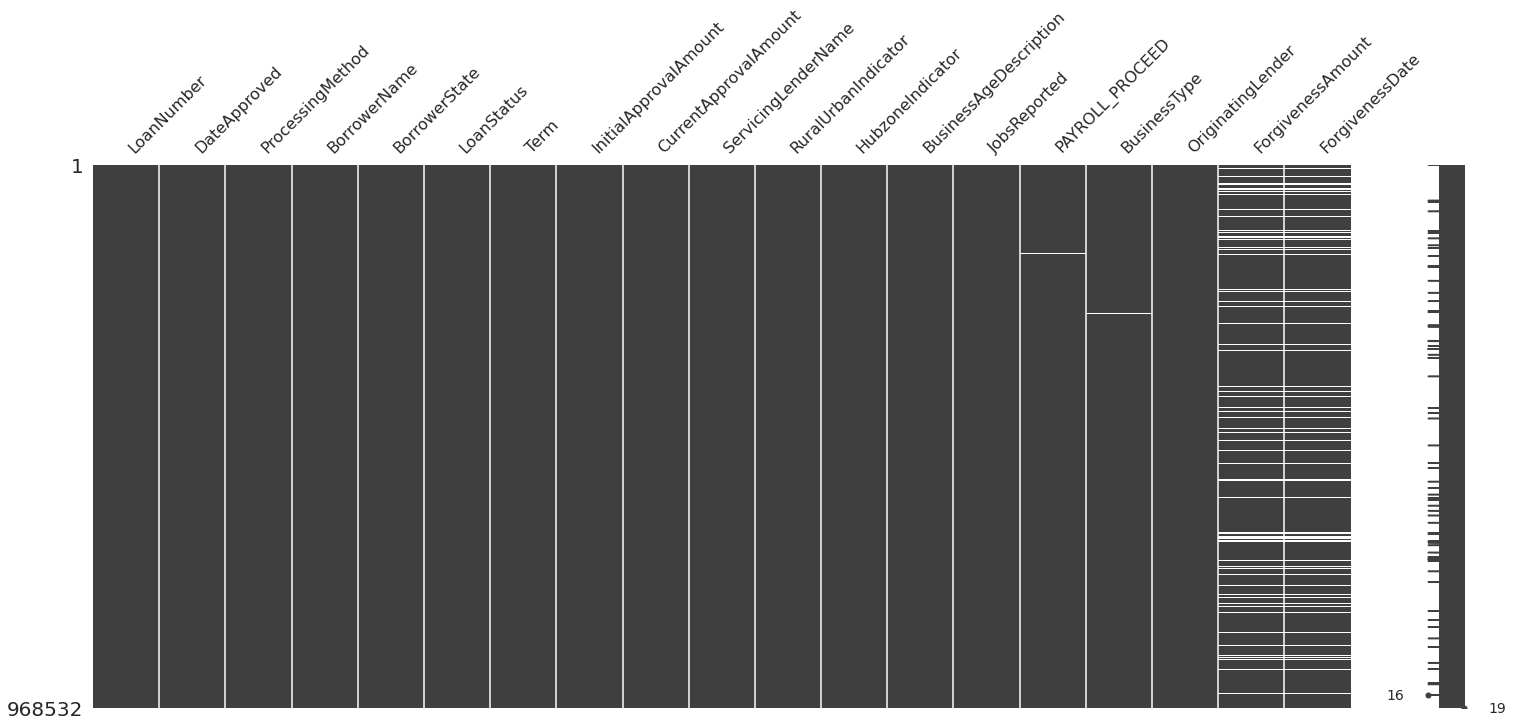

In [12]:
#I will be using the matrix method of missingno to view all NA values.
msno.matrix(ppp_df)

**Note:**
* **Two columns have major NA values that are spread across all the rows - ForgivenessAmount and ForgivenessDate.**
* **Two columns have minor NA values - PAYROLL_PROCEED and BusinessType.**

In [13]:
#droping all na vales in the dataframe
ppp_df.dropna(inplace = True)
ppp_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 872328 entries, 13 to 968531
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LoanNumber              872328 non-null  int64         
 1   DateApproved            872328 non-null  datetime64[ns]
 2   ProcessingMethod        872328 non-null  object        
 3   BorrowerName            872328 non-null  object        
 4   BorrowerState           872328 non-null  object        
 5   LoanStatus              872328 non-null  object        
 6   Term                    872328 non-null  int64         
 7   InitialApprovalAmount   872328 non-null  float64       
 8   CurrentApprovalAmount   872328 non-null  float64       
 9   ServicingLenderName     872328 non-null  object        
 10  RuralUrbanIndicator     872328 non-null  object        
 11  HubzoneIndicator        872328 non-null  object        
 12  BusinessAgeDescription  87232

In [14]:
#reseting the index after droping NA values
ppp_df.reset_index(inplace = True, drop = True)

ppp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872328 entries, 0 to 872327
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   LoanNumber              872328 non-null  int64         
 1   DateApproved            872328 non-null  datetime64[ns]
 2   ProcessingMethod        872328 non-null  object        
 3   BorrowerName            872328 non-null  object        
 4   BorrowerState           872328 non-null  object        
 5   LoanStatus              872328 non-null  object        
 6   Term                    872328 non-null  int64         
 7   InitialApprovalAmount   872328 non-null  float64       
 8   CurrentApprovalAmount   872328 non-null  float64       
 9   ServicingLenderName     872328 non-null  object        
 10  RuralUrbanIndicator     872328 non-null  object        
 11  HubzoneIndicator        872328 non-null  object        
 12  BusinessAgeDescription  872328

In [15]:
#Lets check if there are any duplicate values present in the dataframe
ppp_df.duplicated().sum()

0

**Note:**
* **0 indicates no duplicate values, this is because the data is been sourced from an official government data website.** 

In [16]:
#Checking for unique values in columns which are limited to certain data only.
column_list = [2, 5, 10, 11, 12, 15]

for i in column_list:
    print(f'\033[1m{ppp_df.columns[i]} : \033[0m\n {ppp_df[ppp_df.columns[i]].unique()}')
# \033[1m, \033[0m - to start, end bold

ProcessingMethod : 
 ['PPP' 'PPS']
LoanStatus : 
 ['Paid in Full' 'Exemption 4']
RuralUrbanIndicator : 
 ['U' 'R']
HubzoneIndicator : 
 ['Y' 'N']
BusinessAgeDescription : 
 ['Existing or more than 2 years old' 'Unanswered'
 'New Business or 2 years or less' 'Change of Ownership'
 'Startup, Loan Funds will Open Business']
BusinessType : 
 ['Limited  Liability Company(LLC)' 'Non-Profit Organization' 'Corporation'
 'Cooperative' 'Subchapter S Corporation' 'Partnership'
 'Professional Association' 'Sole Proprietorship'
 'Employee Stock Ownership Plan(ESOP)' '501(c)3 – Non Profit'
 'Non-Profit Childcare Center' 'Limited Liability Partnership'
 'Joint Venture' 'Trust' '501(c)6 – Non Profit Membership'
 'Single Member LLC' 'Self-Employed Individuals' 'Independent Contractors'
 'Tribal Concerns' 'Tenant in Common' 'Housing Co-op'
 'Rollover as Business Start-Ups (ROB' '501(c) – Non Profit except 3,4,6,'
 'Qualified Joint-Venture (spouses)' '501(c)19 – Non Profit Veterans']


In [17]:
#for numerical values we can confirm with the statiscal property of the data using describe.
ppp_df.describe()

,LoanNumber,Term,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,PAYROLL_PROCEED,ForgivenessAmount
count,8.723280e+05,872328.000000,8.723280e+05,8.723280e+05,872328.000000,8.723280e+05,8.723280e+05
mean,5.442324e+09,34.641746,5.336410e+05,5.319424e+05,52.152674,5.153394e+05,5.312635e+05
std,2.543107e+09,16.448831,7.420216e+05,7.356330e+05,67.653568,7.110071e+05,7.355943e+05
min,1.000007e+09,0.000000,0.000000e+00,1.500000e+05,0.000000,0.000000e+00,1.000000e-02
25%,3.303048e+09,24.000000,2.005544e+05,2.007300e+05,18.000000,1.955000e+05,2.010546e+05
50%,5.428977e+09,24.000000,2.965000e+05,2.963210e+05,30.000000,2.876875e+05,2.961443e+05
75%,7.547627e+09,60.000000,5.439048e+05,5.427320e+05,55.000000,5.270000e+05,5.428267e+05
max,9.999007e+09,120.000000,1.000000e+07,1.000000e+07,500.000000,1.000000e+07,1.019627e+07


In [18]:
ppp_df.shape

(872328, 19)

**Note:**
* **All columns have unique values and no extra or wrong values are present in the dataframe**

In [19]:
#exporting the cleaned dataframe in a csv file
ppp_df.to_csv('./public_150k_plus_cleaned.csv')

**Note:**
* **Finally completed with Data Wrangling, now onto the next stage of analysis**

# Exploratory Data Analysis(EDA) and Visualization

In [20]:
# Checking the loan amount min and max values
print(ppp_df['CurrentApprovalAmount'].min(), ppp_df['CurrentApprovalAmount'].max())

150000.0 10000000.0


In [21]:
#min is 150K and max is 10M, so now I will create a category for a range of loan amount.
ppp_df['LoanRange'] = pd.cut(ppp_df['CurrentApprovalAmount'], 
                             bins = [0, 350000, 1000000, 2000000, 5000000, float('inf')], 
                             labels = ['Less than 350K', '350K - 1M', '1M - 2M', '2M - 5M', 'More than 5M'])
ppp_df['LoanRange'].unique()

['More than 5M', '2M - 5M', '1M - 2M', '350K - 1M', 'Less than 350K']
Categories (5, object): ['Less than 350K' < '350K - 1M' < '1M - 2M' < '2M - 5M' < 'More than 5M']

Text(-69.32300000000001, 0.5, 'Loan Range')

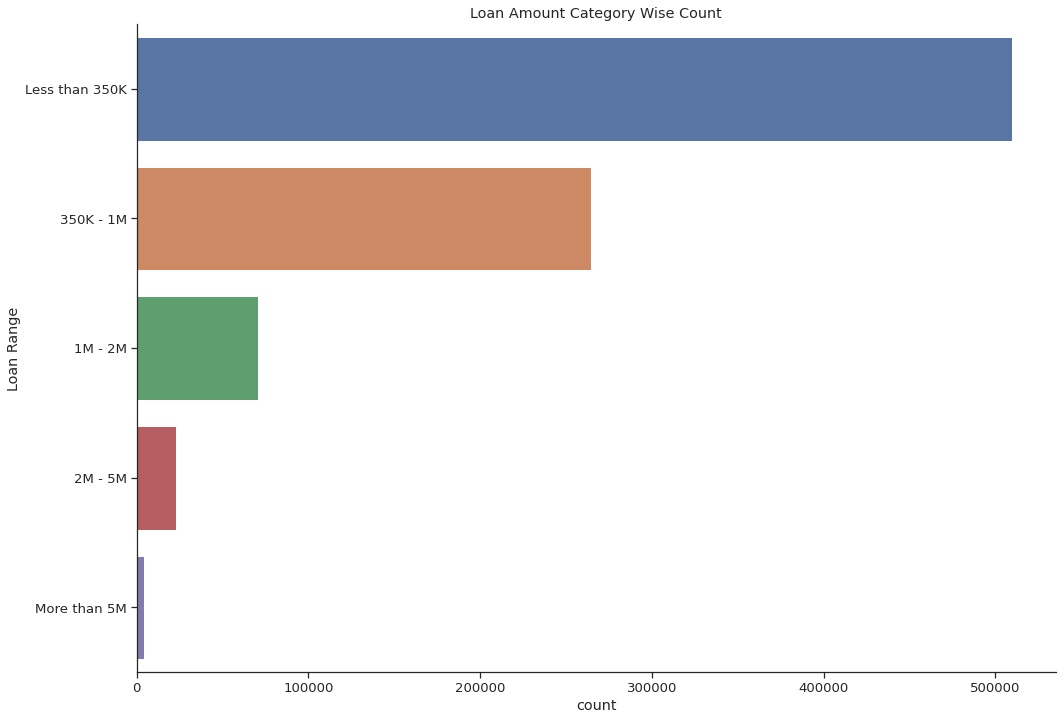

In [22]:
#visualizing the loan category data
sns.catplot(data = ppp_df, y = 'LoanRange', kind = 'count', palette = None, height = 10, aspect = 1.5)
plt.title('Loan Amount Category Wise Count')
plt.ylabel('Loan Range')

**Note:**
* **The highest loan is less than 350K while the least loan taken is more than 5M**
* **Loan amount between 1 - 10M are within the 100K count mark**

Text(0.5, 0, 'Jobs Reported')

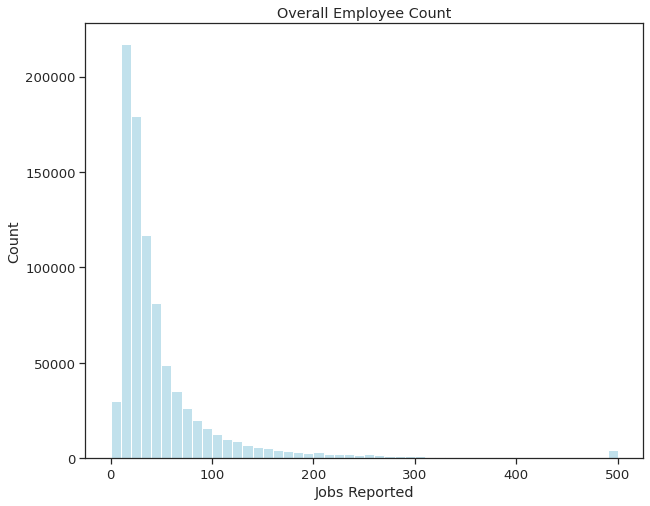

In [23]:
#Now lets review the employees count
sns.histplot(data = ppp_df, x = 'JobsReported', bins = 50, color = 'LightBlue')
plt.title('Overall Employee Count')
plt.xlabel('Jobs Reported')

**Note:**
* **Mojority of the companies reported employees between 10 - 20, after that the trend starts to decline**
* **Few companies did report employees between 490 - 500, even though there is a drop of negligible amount after 300 employess reported**

In [24]:
# Now, lets view both the data together Loan Category vs Employees Count
# grouping on Loan Category
ppp_gb_df = ppp_df.groupby('LoanRange').sum()
ppp_gb_df.reset_index(inplace = True)
ppp_gb_df.head()

,LoanRange,LoanNumber,Term,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,PAYROLL_PROCEED,ForgivenessAmount
0,Less than 350K,2769831382360797,17912651,1.148585e+11,1.143505e+11,13678853.0,1.112012e+11,1.143098e+11
1,350K - 1M,1437898291658268,9148072,1.501403e+11,1.496474e+11,15078304.0,1.453303e+11,1.496563e+11
2,1M - 2M,385680541741006,2448135,1.007180e+11,1.001418e+11,9214234.0,9.724060e+10,1.001150e+11
3,2M - 5M,129017443012128,589150,6.869234e+10,6.862740e+10,5707322.0,6.582162e+10,6.833435e+10
4,More than 5M,25064093070106,120957,3.110074e+10,3.126115e+10,1815525.0,2.995130e+10,3.102054e+10


Text(0.5, 0, 'Loan Range')

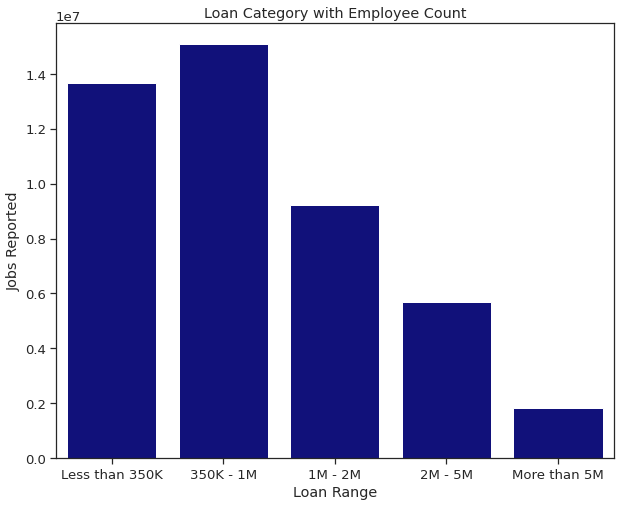

In [25]:
#Vizualizing Loan Category with Employees Count
sns.barplot(data = ppp_gb_df, x = 'LoanRange', y = 'JobsReported', color = 'darkblue')
plt.title('Loan Category with Employee Count')
plt.ylabel('Jobs Reported')
plt.xlabel('Loan Range')

**Note:**
* **Highest employee reported are those that have requested for less than 1M loan amount**
* **More than 1M Loan amount companies have reported less employees, the higher the amount, the less employees reported.**

In [26]:
# Lets look at the state details of the borrower.
ppp_state_df = ppp_df.groupby('BorrowerState').sum()
ppp_state_df.reset_index(inplace = True)

In [27]:
# Sorting state wise highest loan borrowers.
ppp_state_df.sort_values('CurrentApprovalAmount', ascending = False)[:5]

,BorrowerState,LoanNumber,Term,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,PAYROLL_PROCEED,ForgivenessAmount
5,CA,600588340187570,3918709,6.018818e+10,5.985390e+10,5703410.0,5.805736e+10,5.960486e+10
47,TX,376889662671655,2443304,3.681266e+10,3.665855e+10,3693534.0,3.519517e+10,3.657898e+10
37,NY,332045152604614,2212606,3.565657e+10,3.556278e+10,3353807.0,3.399544e+10,3.537989e+10
10,FL,274920648550745,1750464,2.472237e+10,2.451766e+10,2655433.0,2.376914e+10,2.447006e+10
16,IL,198644055168891,1293367,2.118973e+10,2.114872e+10,1940479.0,2.005892e+10,2.114169e+10


In [28]:
# Vizualizing the state data on map plot by plotly.
px.choropleth(ppp_state_df, locations = 'BorrowerState', locationmode = 'USA-states', scope = 'usa', 
              color = 'CurrentApprovalAmount', color_continuous_scale = 'plasma_r',
              title = 'State wise loan amount borrowed', labels = {'BorrowerState': 'State', 'CurrentApprovalAmount': 'Total Loan Amount'})

Text(0.5, 0, 'Loan Amount (In 10 Billions)')

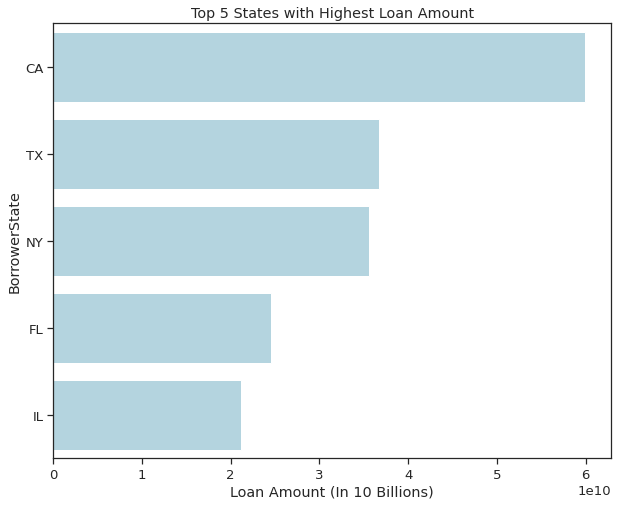

In [29]:
#lets view the top 5 states on a bar plot.
sns.barplot(data = ppp_state_df, x = 'CurrentApprovalAmount', y = 'BorrowerState', 
            order = ppp_state_df.sort_values('CurrentApprovalAmount', ascending = False)[:5]['BorrowerState'],
           color = 'LightBlue')
plt.title('Top 5 States with Highest Loan Amount')
plt.xlabel('Loan Amount (In 10 Billions)')

<AxesSubplot:xlabel='count', ylabel='OriginatingLender'>

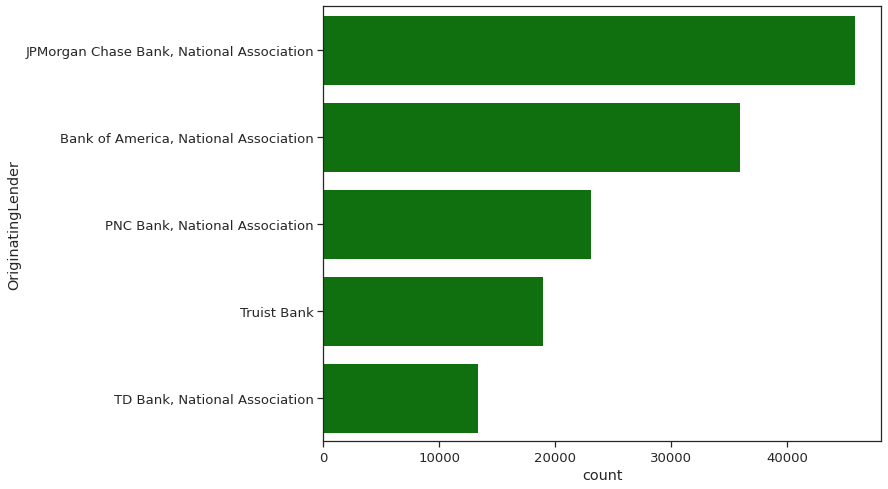

In [30]:
# Lets check the top Loan Lenders
sns.countplot(data = ppp_df, y = 'OriginatingLender', order = ppp_df['OriginatingLender'].value_counts().index[:5], color = 'Green')

<AxesSubplot:xlabel='count', ylabel='BusinessType'>

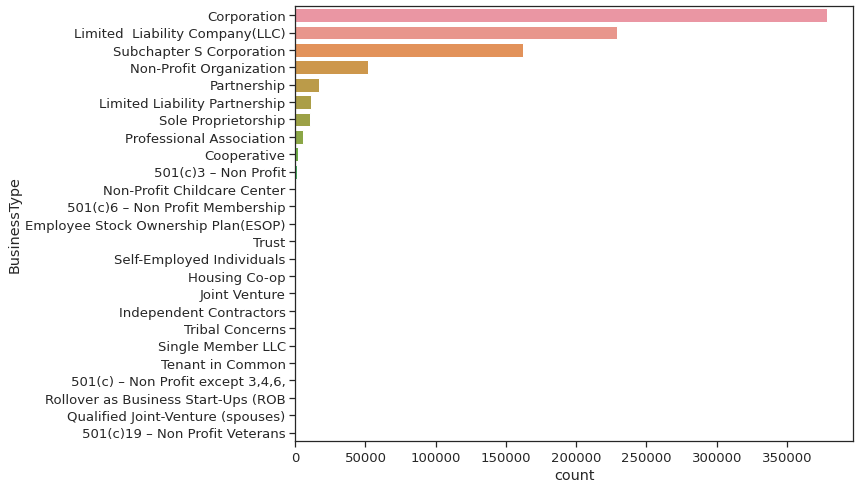

In [31]:
# Lets look at which business type has borrowed Loan?
sns.countplot(data = ppp_df, y = 'BusinessType', order = ppp_df['BusinessType'].value_counts().index)

**Note:**

**Only the top 4 have a good amount of data for futher analysis**

In [32]:
#filtering as per the above note
ppp_business_df = ppp_df[ppp_df['BusinessType'].isin(['Corporation', 'Limited  Liability Company(LLC)','Subchapter S Corporation', 'Non-Profit Organization'])]

# Sorting as per the date approved
ppp_business_df = ppp_business_df.sort_values(['DateApproved']).reset_index(drop = True)

# Grouping the data as per approved date and business type on count and cumulative sum aggregate function
ppp_biz_count_df = ppp_business_df.groupby(['DateApproved', 'BusinessType']).count().groupby(level = -1).cumsum().reset_index()

# Grouping the data as per approved date and business type on sum aggregate function
ppp_biz_sum_df = ppp_business_df.groupby(['DateApproved', 'BusinessType']).sum().reset_index()

In [33]:
ppp_biz_count_df

,DateApproved,BusinessType,LoanNumber,ProcessingMethod,BorrowerName,BorrowerState,LoanStatus,Term,InitialApprovalAmount,CurrentApprovalAmount,ServicingLenderName,RuralUrbanIndicator,HubzoneIndicator,BusinessAgeDescription,JobsReported,PAYROLL_PROCEED,OriginatingLender,ForgivenessAmount,ForgivenessDate,LoanRange
0,2020-04-03,Corporation,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415,4415
1,2020-04-03,Limited Liability Company(LLC),2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454,2454
2,2020-04-03,Non-Profit Organization,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390
3,2020-04-03,Subchapter S Corporation,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439,1439
4,2020-04-04,Corporation,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522,11522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,2021-06-29,Limited Liability Company(LLC),228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749,228749
929,2021-06-29,Subchapter S Corporation,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467,162467
930,2021-06-30,Corporation,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224,378224
931,2021-06-30,Limited Liability Company(LLC),228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754,228754


In [34]:
ppp_biz_sum_df

,DateApproved,BusinessType,LoanNumber,Term,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,PAYROLL_PROCEED,ForgivenessAmount
0,2020-04-03,Corporation,19691147267155,106174,2.905545e+09,2.884835e+09,263319.0,2.729845e+09,2.886727e+09
1,2020-04-03,Limited Liability Company(LLC),10956170290186,58952,1.407160e+09,1.405718e+09,140284.0,1.328044e+09,1.400893e+09
2,2020-04-03,Non-Profit Organization,1743438081864,9360,3.555586e+08,3.560743e+08,39918.0,3.333939e+08,3.572732e+08
3,2020-04-03,Subchapter S Corporation,6436775760269,34715,9.413428e+08,9.342935e+08,84931.0,8.795452e+08,9.389455e+08
4,2020-04-04,Corporation,34320182754372,171505,4.693424e+09,4.659964e+09,404208.0,4.436636e+09,4.667289e+09
...,...,...,...,...,...,...,...,...,...
928,2021-06-29,Limited Liability Company(LLC),20899923897,1080,1.564547e+07,1.564547e+07,1875.0,1.564543e+07,1.572349e+07
929,2021-06-29,Subchapter S Corporation,6980954626,360,6.828970e+06,6.828970e+06,491.0,6.828944e+06,6.859345e+06
930,2021-06-30,Corporation,4723826431,240,3.505392e+06,3.505392e+06,720.0,3.505385e+06,3.518165e+06
931,2021-06-30,Limited Liability Company(LLC),5903805526,300,4.227408e+06,4.227408e+06,928.0,4.227398e+06,4.254382e+06


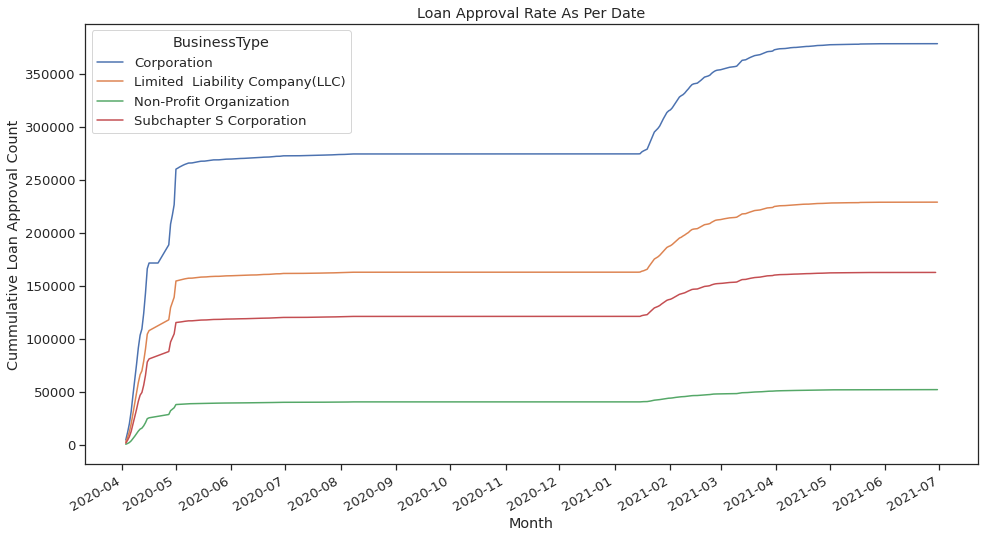

In [35]:
# which business type among the top 4 were reciving loan on which month at what speed of approval?
# We can use any columns in the dataframe because all will have similar data.

fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(ax = ax, data = ppp_biz_count_df, x = 'DateApproved', y = 'CurrentApprovalAmount', hue = 'BusinessType')
ax.set(xlabel = 'Month', ylabel = 'Cummulative Loan Approval Count', title = 'Loan Approval Rate As Per Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
fig.autofmt_xdate()

**Note**
* **As you can see the one who has got the most approval for loan is corporation during the whole program and the least is Non - Profit Organization**
* **Pattern for loan approval is similar for all four, during the first 3 months majority of the companies received approval and later in the year 2021 during Jan to May approval were given to companies steadily**

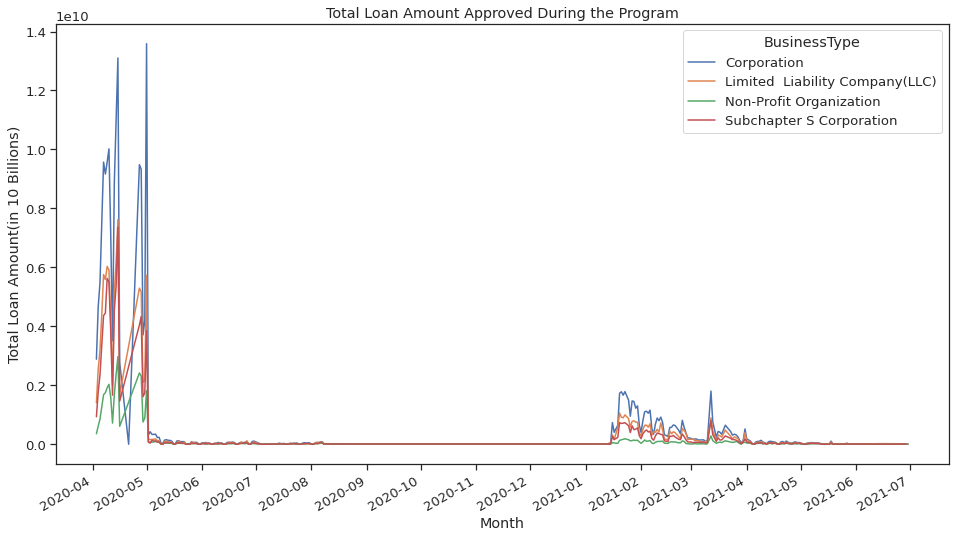

In [36]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(ax = ax, data = ppp_biz_sum_df, x = 'DateApproved', y = 'CurrentApprovalAmount', hue = 'BusinessType')
ax.set(xlabel = 'Month', ylabel = 'Total Loan Amount(in 10 Billions)', title = 'Total Loan Amount Approved During the Program')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 1))
fig.autofmt_xdate()

**Note:**
* **As you can see the loan amount for corporation is the highest and Non profit organization is the lowest as per the approval speed plot above**
* **Intially huge amount of loan were approved and borrowed by all the organization, corporation reaching the highest of all, approx 14 Billions, while in the year 2021, no one exceeded 2 Billion.**